In [2]:
import numpy as np
from PIL import Image
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [3]:
img = Image.open("C:\\Users\\sidar\\Desktop\\MLISA.jpg")

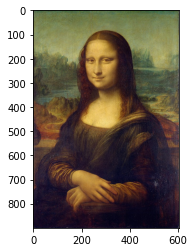

In [4]:
plt.imshow(img)

In [5]:
mLisa_array = np.array(img)

In [6]:
def sample(height, width, num=5000):
    coordinates = []
    for i in range(num):
        x = np.random.randint(low=0, high=height, size=(1,))
        y = np.random.randint(low=0, high=width, size=(1,))
        coordinates.append([x[0], y[0]])
    return coordinates

In [7]:
coordinates = sample(height=900, width=604)

In [8]:
mLisa_array.shape

(900, 604, 3)

In [9]:
def regress(coordinates):
    pixels = []
    for coord in coordinates:
        rgb = mLisa_array[coord[0], coord[1], :]
        pixels.append(rgb)
    return pixels

In [10]:
pixels = regress(coordinates)

In [11]:
pixels = np.array(pixels)

In [12]:
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X=coordinates, y=pixels)

RandomForestRegressor(n_estimators=10)

In [13]:
def approximate(classifier, image_array):
    predicted = []
    for i in range(0, image_array.shape[0], 1):
        row_predictions = []
        for j in range(0, image_array.shape[1], 1):
            prediction_coordinate = [[i, j]]
            rgb_prediction = classifier.predict(prediction_coordinate)
            row_predictions.append(rgb_prediction[0])
        predicted.append(row_predictions)
    predicted = np.asarray(predicted, dtype=int)
    return predicted

In [67]:
predicted_array = approximate(rfr, mLisa_array)

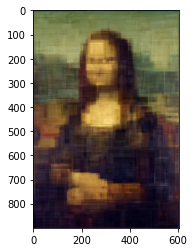

In [68]:
plt.imshow(predicted_array)

## Varying Depth of one Tree

In [94]:
rfr_d1 = RandomForestRegressor(n_estimators=1, max_depth=1)
rfr_d1.fit(coordinates, pixels)

RandomForestRegressor(max_depth=1, n_estimators=1)

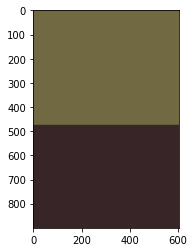

In [95]:
predicted_array = approximate(rfr_d1, mLisa_array)
plt.imshow(predicted_array)

In [96]:
rfr_d2 = RandomForestRegressor(n_estimators=1, max_depth=2)
rfr_d2.fit(coordinates, pixels)

RandomForestRegressor(max_depth=2, n_estimators=1)

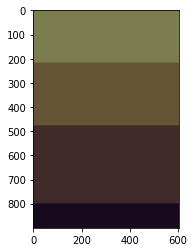

In [97]:
predicted_array = approximate(rfr_d2, mLisa_array)
plt.imshow(predicted_array)

In [98]:
rfr_d3 = RandomForestRegressor(n_estimators=1, max_depth=3)
rfr_d3.fit(coordinates, pixels)

RandomForestRegressor(max_depth=3, n_estimators=1)

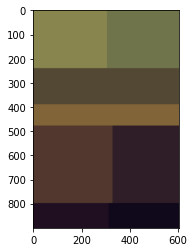

In [99]:
predicted_array = approximate(rfr_d3, mLisa_array)
plt.imshow(predicted_array)

In [100]:
rfr_d5 = RandomForestRegressor(n_estimators=1, max_depth=5)
rfr_d5.fit(coordinates, pixels)

RandomForestRegressor(max_depth=5, n_estimators=1)

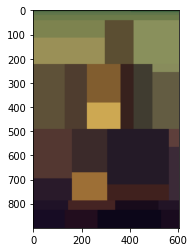

In [101]:
predicted_array = approximate(rfr_d5, mLisa_array)
plt.imshow(predicted_array)

In [102]:
rfr_d10 = RandomForestRegressor(n_estimators=1, max_depth=10)
rfr_d10.fit(coordinates, pixels)

RandomForestRegressor(max_depth=10, n_estimators=1)

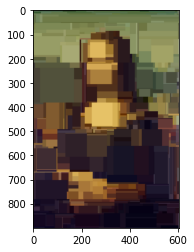

In [103]:
predicted_array = approximate(rfr_d10, mLisa_array)
plt.imshow(predicted_array)

In [104]:
rfr_d15 = RandomForestRegressor(n_estimators=1, max_depth=15)
rfr_d15.fit(coordinates, pixels)

RandomForestRegressor(max_depth=15, n_estimators=1)

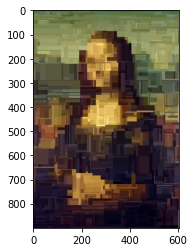

In [105]:
predicted_array = approximate(rfr_d15, mLisa_array)
plt.imshow(predicted_array)

## Varying Number of Trees

In [81]:
rfr_n1 = RandomForestRegressor(n_estimators=1, max_depth=7)
rfr_n1.fit(coordinates, pixels)

RandomForestRegressor(max_depth=7, n_estimators=1)

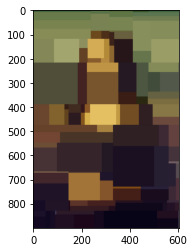

In [82]:
predicted_array = approximate(rfr_n1, mLisa_array)
plt.imshow(predicted_array)

In [83]:
rfr_n3 = RandomForestRegressor(n_estimators=3, max_depth=7)
rfr_n3.fit(coordinates, pixels)

RandomForestRegressor(max_depth=7, n_estimators=3)

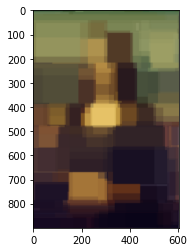

In [84]:
predicted_array = approximate(rfr_n3, mLisa_array)
plt.imshow(predicted_array)

In [85]:
rfr_n5 = RandomForestRegressor(n_estimators=5, max_depth=7)
rfr_n5.fit(coordinates, pixels)

RandomForestRegressor(max_depth=7, n_estimators=5)

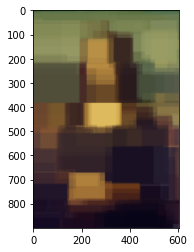

In [86]:
predicted_array = approximate(rfr_n5, mLisa_array)
plt.imshow(predicted_array)

In [87]:
rfr_n10 = RandomForestRegressor(n_estimators=10, max_depth=7)
rfr_n10.fit(coordinates, pixels)

RandomForestRegressor(max_depth=7, n_estimators=10)

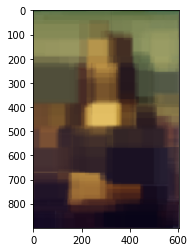

In [88]:
predicted_array = approximate(rfr_n10, mLisa_array)
plt.imshow(predicted_array)

In [89]:
rfr_n100 = RandomForestRegressor(n_estimators=100, max_depth=7)
rfr_n100.fit(coordinates, pixels)

RandomForestRegressor(max_depth=7)

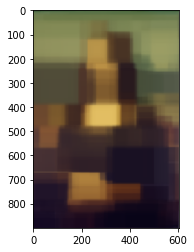

In [90]:
predicted_array = approximate(rfr_n100, mLisa_array)
plt.imshow(predicted_array)

## k-NN

In [91]:
from sklearn.neighbors import KNeighborsRegressor

In [92]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(coordinates, pixels)

KNeighborsRegressor(n_neighbors=1)

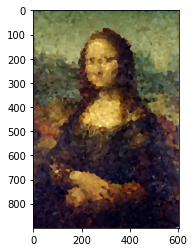

In [93]:
predicted_array = approximate(knn, mLisa_array)
plt.imshow(predicted_array)

## Pruning

In [108]:
rfr_split = RandomForestRegressor(n_estimators=10, min_samples_split=5)
rfr_split.fit(coordinates, pixels)

RandomForestRegressor(min_samples_split=5, n_estimators=10)

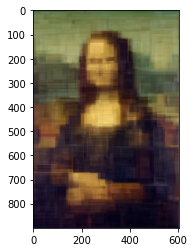

In [109]:
predicted_array = approximate(rfr_split, mLisa_array)
plt.imshow(predicted_array)

In [110]:
rfr_leaf = RandomForestRegressor(n_estimators=10, min_samples_leaf=2)
rfr_leaf.fit(X=coordinates, y=pixels)

RandomForestRegressor(min_samples_leaf=2, n_estimators=10)

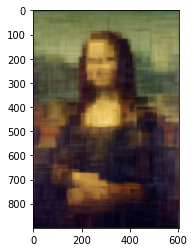

In [111]:
predicted_array = approximate(rfr_leaf, mLisa_array)
plt.imshow(predicted_array)